#### Name: 

# PHYS 230 Lab Assignment 8

### Wednesday, February 18: Chapter 5.1-5.3
- Evaluating integrals in python 
    - Trapezoidal Rule
    - Simpson's Rule

#### Start by importing any packages you need below (feel free to update as you go):

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

## The overall goal of lab today 

Today we are going to evaluate the integral: 
$$\int_{1.1}^{10.1} \frac{\sin{x}}{\ln{x}} \,dx $$

### Step 1 (10 pts)

Write a user-defined function `f(x)` to evaluate the given **function** in the integral. Include comments in your code (and markdown cell, if necessary) explaining your process. 

In [23]:
def f(x):
    return math.sin(x) / math.log(x)
def df_dx(x):
    return (math.cos(x)*math.log(x) - (math.sin(x) / x)) / (math.log(x)**2)

### Applying Trapezoidal Rule (22 pts)


Write a code to do the following: 
- Create a user-defined function `trapezoidal_int(a,b,N,f)` to determine the integral using the trapezoidal rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 100$ steps
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code

In [24]:
# Function to integrate using Trapezoidal Rule
def trapezoidal_int(a, b, N, f):
    h = (b-a) / N
    s = 0.5*f(a)+0.5*f(b)
    for k in range(1, N):
        s += f(a+k*h)
    return(h*s)

In [46]:
# N = 100 steps 
print(trapezoidal_int(1.1, 10.1, 100, f))

2.9021883624907003


In [38]:
# double steps 
print(trapezoidal_int(1.1, 10.1, 200, f))

2.8628779013854735


In [56]:
# estimate error 
def trapezoidal_err(a, b, N, f):
    I1 = trapezoidal_int(a, b, int(0.5*N), f)
    I2 = trapezoidal_int(a, b, N, f)
    return abs((1/3) * (I2 - I1))

print(trapezoidal_err(1.1, 10.1, 200, f))

0.013103487035075615


### Applying Simpson's Rule (22 pts)

Write a code to do the following: 
- Create a user-defined function `simpsons_int(a,b,N,f)` to determine the integral using Simpson's rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 50$ steps [note this is half of the initial steps used in trapezoidal]
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 

In [59]:
# Function to integrate using Simpson's Rule 
def simpsons_int(a, b, N, f):
    h = (b-a) / N
    s = f(a) + f(b)
    for k in range(1, N):
        if k%2 == 1:
            s += 4*f(a+k*h)
        else:
            s += 2*f(a+k*h)
    return (1/3)*h*s

In [60]:
#N = 50 steps 
print(simpsons_int(1.1, 10.1, 50, f))

2.9012217056816034


In [61]:
# double steps
print(simpsons_int(1.1, 10.1, 100, f))

2.856855482008929


In [62]:
# error (of the estimate where N=100)
def simpsons_err(a, b, N, f):
    I1 = simpsons_int(a, b, int(0.5*N), f)
    I2 = simpsons_int(a, b, N, f)
    return abs((1/15) * (I2 - I1))

print(simpsons_err(1.1, 10.1, 100, f))

0.0029577482448449525


### Evaluating error and number of steps (20 pts)

In a markdown cell, discuss your results from the two different methods above. In particular, focus on the following: 
- Each method uses a different number of steps, which also means different amounts of time. How do their error estimates compare? 
- Comment on the estimated error for each compared to the direct computation of error (the difference between your value and the true value of 2.84895)
- Does the number of steps in each calculation seem appropriate? To determine this, think about what what accuracy is desired in this calculation and compare it with the measured errors. Let's say that we want to calculate the integrand to a target accuracy of 0.003
    - comment on the two different techniques with regard to this result
    - if either of the results don't meet the desired accuracy, determine how many steps are necessary to do so using the appropriate equation for doubling the number of steps (see section 5.3 in the book). For example, for Trapezoidal rule: 
    $$ I_i = \frac{1}{2}I_{i-1} + h_i\sum_{k=1 (k \text{ odd})}^{N_i-1} f(a+kh_i)$$


The Simpson's Rule approximation is closer to the true value for any given number of slices comprising the approximation, and so achieves a better answer in fewer steps, though each step is somewhat more complex than the corresponding steps for the trapezoidal approximation. 

Estimated Error - Simpson's (100): 0.0029577482448449525
Calculated Error - Simpson's (100): 0.00082441435

Estimated Error - Trapezoidal (200): 0.013103487035075615
Calculated Error - Trapezoidal (200): 0.01392790139

When calculated manually, the error is slightly higher for the trapezoidal approximation and vastly lower for the Simpson's approximation.
The Simpson's approximation either barely or vastly exceeds the desired precision with N=100 steps. Wasn't able to get my code using the given equation for doubling N before the due date, but I checked using the functions I defined earlier and the steps need to be doubled twice to reach sufficient accuracy, or N=800.

In [77]:
a = 1.1
b = 10.1
I = [trapezoidal_int(a, b, 200, f)]
err = trapezoidal_err(a, b, 200, f)
i = 0
while err > 0.003:
    i += 1
    N_i = (2**i) * 200
    h_i = (a + b) / N_i
    s = 0
    for k in range(1, N_i):
        if k%2 != 1:
            s += f(a+k*h_i)
    I.append((0.5*I[i-1]) + h_i*s)
    err = abs((1/15) * (I[i] - I[i-1]))
print(i, err)
print(I)
#something is grievously wrong with my code that uses the given equation for doubling N

4 0.001071146229566337
[2.8628779013854735, 2.374457014346807, 2.186938400161357, 2.1234805340170992, 2.107413340573604]


In [85]:
i = 0
while trapezoidal_err(1.1, 10.1, (2**i) * 200, f) > 0.003:
    i += 1
print(i)

2


### Integrating Data (22 pts)

In GitHub, you will find a file called `forces.txt`, which contins two columns of numbers. The first column reprsents the distance $x$ in meters and the second is the force $F$ along the x-direction in Newtons on the particle. We want to determine the work done on the particle, by doing the following: 

- read in the data
- use the trapezoidal rule to calculate the approximate work done on the particle in the $x$-direction. 
- plot the original force vs. distance data 
- plot the total work as a function of distance on the same graph - what is the work done? 
    - does this look familiar? 

Remember that: 

$$ W = \int_a^b F(x) \,d x $$

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 


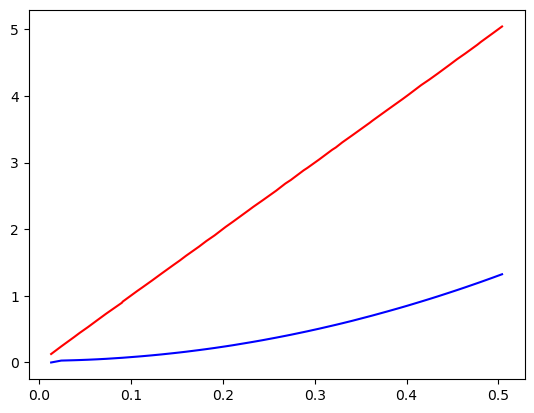

In [113]:
forces = np.loadtxt('forces.txt', float)
x = forces[0:50, 0]
F = forces[0:50, 1]
W_arr = [0]
i = 0
W = h * (0.5 * F[0] + 0.5 * F[49])
while i < 49:
    h = x[i+1] - x[i]
    W += h * F[i+1]
    W_arr.append(float(W))
    i += 1
plt.plot(x, F, c='red')
plt.plot(x, W_arr, c='blue')
plt.show()

The force on the object seems directly proportional to distance from the origin, so this data is likely from a spring and mass system, or another system with a restoring force entirely dependent 